In [20]:
from pylab import *

%matplotlib inline

In [11]:
data_files = []

data_files.append('data/regression_similarity-N=100-W=1700-rc=1e-15-170517.npz')
data_files.append('data/regression_similarity-N=1000-W=1700-rc=1e-15-170517.npz')
data_files.append('data/regression_similarity-N=100-W=1700-rc=0.05-170517.npz')
data_files.append('data/regression_similarity-N=1000-W=1700-rc=0.05-170517.npz')

data_files.append('data/regression_diff_similarity-N=100-W=1700-rc=1e-15-170517.npz')
data_files.append('data/regression_diff_similarity-N=1000-W=1700-rc=1e-15-170517.npz')
data_files.append('data/regression_diff_similarity-N=100-W=1700-rc=0.05-170517.npz')
data_files.append('data/regression_diff_similarity-N=1000-W=1700-rc=0.05-170517.npz')

data_files.append('data/reg_outer_similarity-N=100-W=1700-rc=1e-15-170517.npz')
data_files.append('data/reg_outer_similarity-N=1000-W=1700-rc=1e-15-170517.npz')

data_files.append('data/reg_outer_diff_similarity-N=100-W=1700-rc=1e-15-170517.npz')
data_files.append('data/reg_outer_diff_similarity-N=1000-W=1700-rc=1e-15-170517.npz')



In [12]:
h = []

for f in data_files:
    h.append(np.load(f))
    


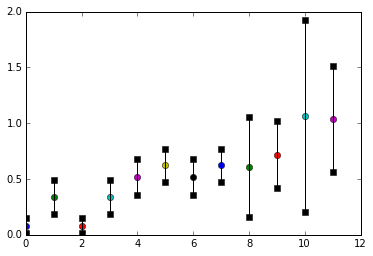

In [22]:
for i in range(len(h)):
    plot(i, h[i]['test_mean'][-1], 'o')
    plot([i, i], 
         [h[i]['test_mean'][-1] - h[i]['test_std'][-1], h[i]['test_mean'][-1] + h[i]['test_std'][-1]], 
          '-sk')

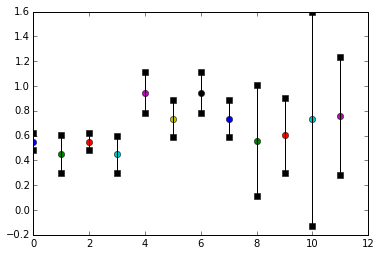

In [23]:
for i in range(len(h)):
    ttm = h[i]['test_mean'][-1] / h[i]['train_mean'][-1]
    plot(i, ttm, 'o')
    plot([i, i], 
         [ttm - h[i]['test_std'][-1], ttm + h[i]['test_std'][-1]], 
          '-sk')